<a href="https://colab.research.google.com/github/sadashish2002/Data_Wrangling_Using_Python_Library/blob/main/Data_Analysis_of_Job.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Data Science Job Opportunities

In [ ]:
# importing all required libraries
from bs4 import BeautifulSoup
import requests
import pandas as pd
import re
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
# Creating main soup using Beautifulsoup
link1="https://www.shine.com/job-search/data-scientist-jobs?q=data-scientist-jobs"
page1=requests.get(link1)
soup1=BeautifulSoup(page1.text,"html.parser")


In [ ]:
# Extracting all page link from main page
all_pages=soup1.find_all(class_="jsrp_pagination_navLink__WzKGD")
pages=[links.get("href") for links in all_pages]

In [ ]:
# creating blank list to add data from every page
title=[]
company_name=[]
experience=[]
location=[]
skill=[]
minimum_salary=[]
maximum_salary=[]
industry=[]

for page_link in pages:
        link="https://www.shine.com/job-search/"+page_link
        page=requests.get(link)
        soup=BeautifulSoup(page.text,"html.parser")

        # Extracting title from site and appending that inside title list
        raw_title=soup.find_all("h2",itemprop="name")
        for i in raw_title:
            title.append(i.text)

        # Extracting company name from site and appending that inside company_name list
        raw_company=soup.find_all(class_="jobCard_jobCard_cName__mYnow")
        for x in raw_company:
            company_name.append(x.text)

        # Extracting experience from site and appending only minimum experience inside experience list
        raw_experience=soup.find_all(class_="jobCard_jobCard_lists_item__YxRkV jobCard_jobIcon__3FB1t")
        for i in raw_experience:
            experience.append(int(i.text[0]))

        # Extracting location data from web site and appending it to location list
        raw_location=soup.find_all(class_="jobCard_jobCard_lists_item__YxRkV jobCard_locationIcon__zrWt2")
        lct=[]
        for i in raw_location:
            x=i.text
            a=x.replace("+",",").replace("Other","")
            location.append(re.sub(r'\d', '', a).replace(" ","").split(","))


        temp=soup.find_all(itemprop="url")
        page_link=[i.get("content") for i in temp]



        for link in page_link:
            # Creating main soup
            temp_link=requests.get(link)
            sup=BeautifulSoup(temp_link.text,"html.parser")

            # Extracting data for skill
            sk=sup.find_all(class_="btn btn-white-border")
            sub_link=[i.text.lower() for i in sk]
            skill.append(sub_link)

            # Extracting data for salary range
            slr_element = sup.find(class_="JobDetailWidget_jobCard_lists_item__w6Yow undefined JobDetailWidget_salaryIcon__lz4lf")

            if slr_element:
                slr_text=slr_element.text
                pattern=r'\b\d+\b'
                matches=re.findall(pattern, slr_text)

                if matches:
                    minimum_salary.append(int(matches[0]))
                    maximum_salary.append(int(matches[-1]))
                else:
                    minimum_salary.append(np.nan)
                    maximum_salary.append(np.nan)
            else:
                minimum_salary.append(np.nan)
                maximum_salary.append(np.nan)

        # extracting industry data
            industry.append(sup.find(class_="jobDetail_OtherDetails__uwJHU").text.replace("Industry IT",',').split(",")[-1])

In [ ]:
# creating data frame
main_dict={"title":title,"company_name":company_name,"experience":experience,"location":location,"skill":skill,"minimum_salary":minimum_salary,"maximum_salary":maximum_salary,"Industry":industry}
df=pd.DataFrame(main_dict)

In [ ]:
df

,title,company_name,experience,location,skill,minimum_salary,maximum_salary,Industry
0,Lead Data Scientist/ Principal Data Scientist,Fractal,5,"[Bangalore, Karnataka]","[data science, machine learning, statistical a...",NaN,NaN,Others
1,Data Scientist,People Staffing Solutions,4,"[Bangalore, Noida, Chennai, Hyderabad, Gurugra...","[data extraction, data analytics, data science...",14.0,16.0,IT Services & Consulting
2,Assistant Director Data Scientist,Acuity Knowledge Partners,8,[AllIndia],"[machine learning, engineering, technology, re...",NaN,NaN,Financial Services
3,Data Scientist(6-9 Years),Siemens,2,"[Maharashtra, Pune]","[python, scala, data analytics, data science, ...",NaN,NaN,Power / Energy
4,Data Scientist II,Chegg India,3,[Delhi],"[data mining, analytical skills, communication...",NaN,NaN,IT Services & Consulting
...,...,...,...,...,...,...,...,...
95,Data Scientist 3,Oracle,3,[Karnataka],"[information retrieval, natural language proce...",NaN,NaN,Software Product
96,"Senior Data Scientist (Relocate to HCMC, VietNam)",MASAN Group,5,[Delhi],"[machine learning, artificial intelligence, na...",NaN,NaN,Others
97,Data Scientist (Computer Vision),Revolut,3,"[Chennai, TamilNadu]","[software engineering, machine learning, compu...",NaN,NaN,Internet / E-Commerce
98,Data Scientist / AI ML EngineerPD,Programming.com,4,"[Hyderabad, Telangana]","[machine learning, deep learning, natural lang...",NaN,NaN,Others


## Top 10 skill for data science/analysis job

In [ ]:
all_skill=sum(df["skill"],[])
skill_count={i:all_skill.count(i) for i in all_skill}
sorted_skills=(sorted(skill_count.items(), key=lambda item: item[1], reverse=True)) # sorted higher count to lower count
treanding_skill=sorted_skills[:10] # taking top 10 skill

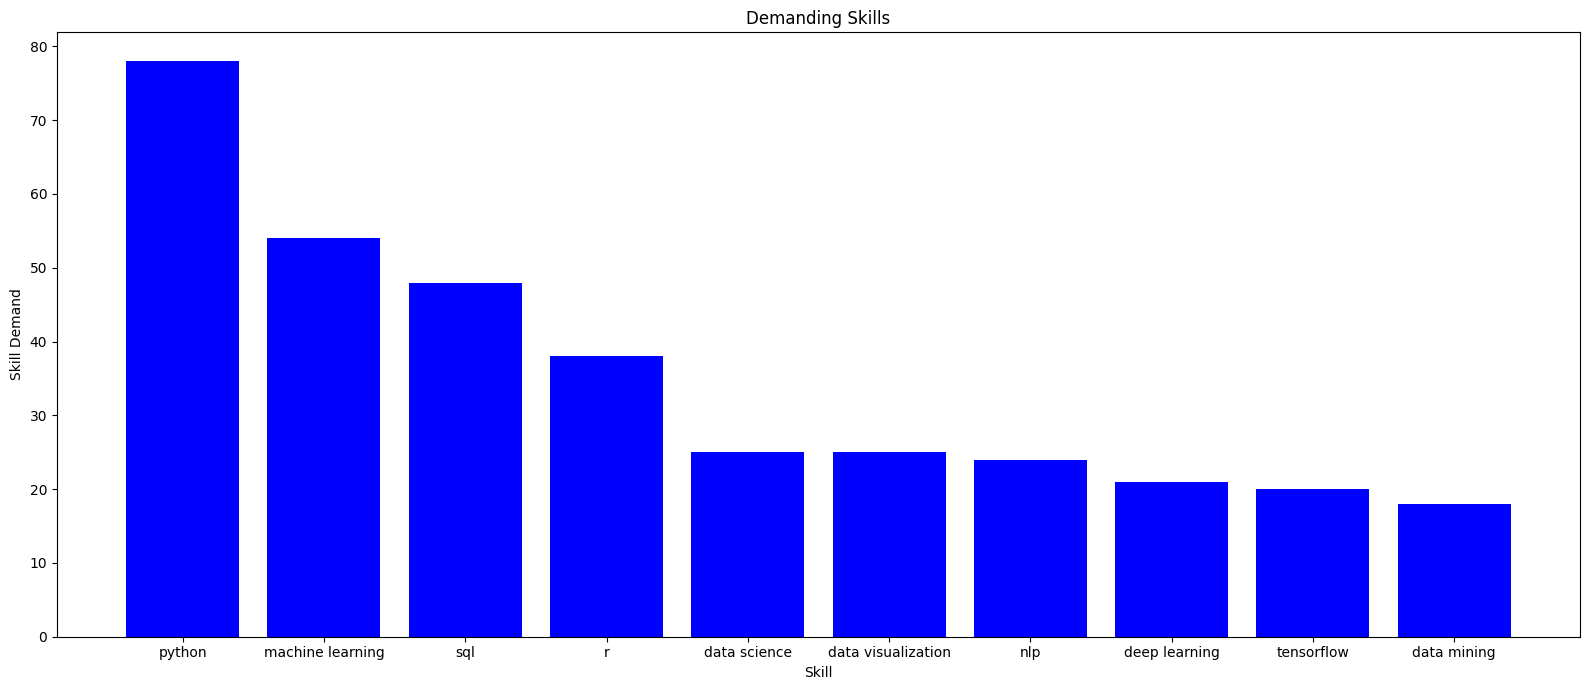

In [ ]:

skills=[i[0] for i in treanding_skill]
demand=[i[1] for i in treanding_skill]

plt.figure(figsize=(16,7))
plt.bar(skills,demand,color="blue")
plt.xlabel("Skill")
plt.ylabel("Skill Demand")
plt.title("Demanding Skills")
plt.tight_layout()
plt.show()

## Top 10 locations with the highest number of job postings.

In [ ]:
all_location=sum(df["location"],[])
location_count={i:all_location.count(i) for i in all_location}
sorted_location=sorted(location_count.items(), key=lambda item: item[1], reverse=True)

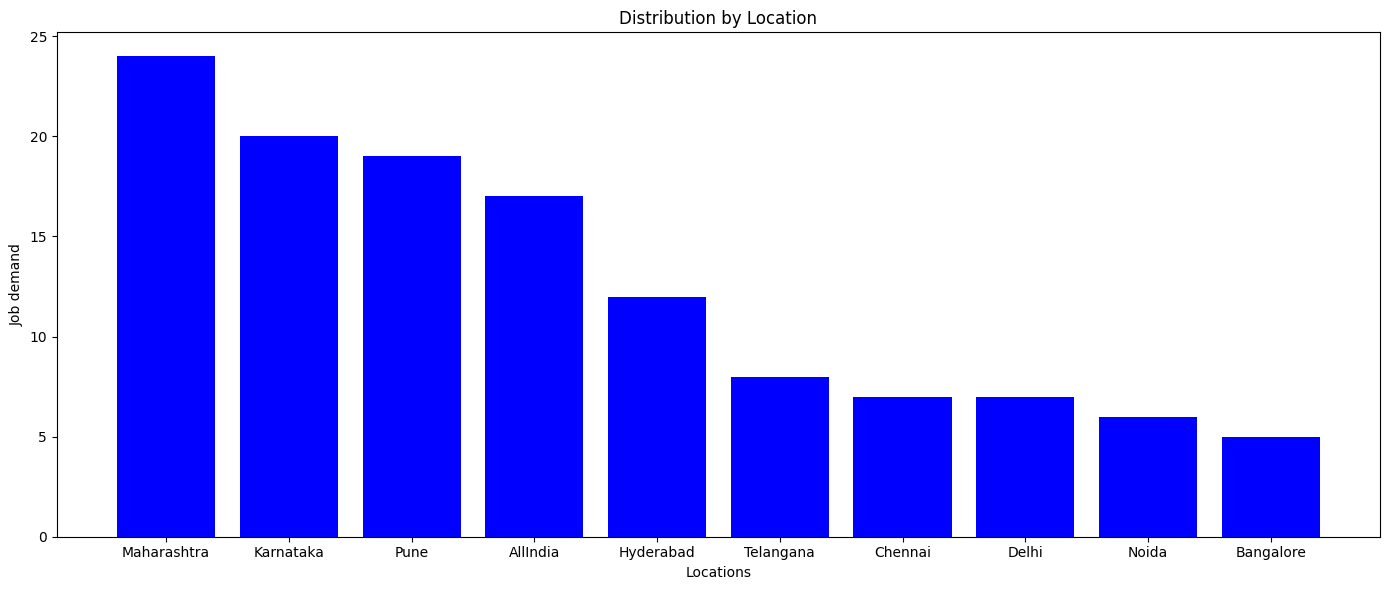

In [ ]:
area=[i[0] for i in sorted_location[:10]]
density=[i[1] for i in sorted_location[:10]]
plt.figure(figsize=(14, 6))
plt.bar(area, density, color='blue')
plt.xlabel('Locations')
plt.ylabel('Job demand')
plt.title('Distribution by Location')
plt.tight_layout()
plt.show()

## Industry-wise data science job demand.

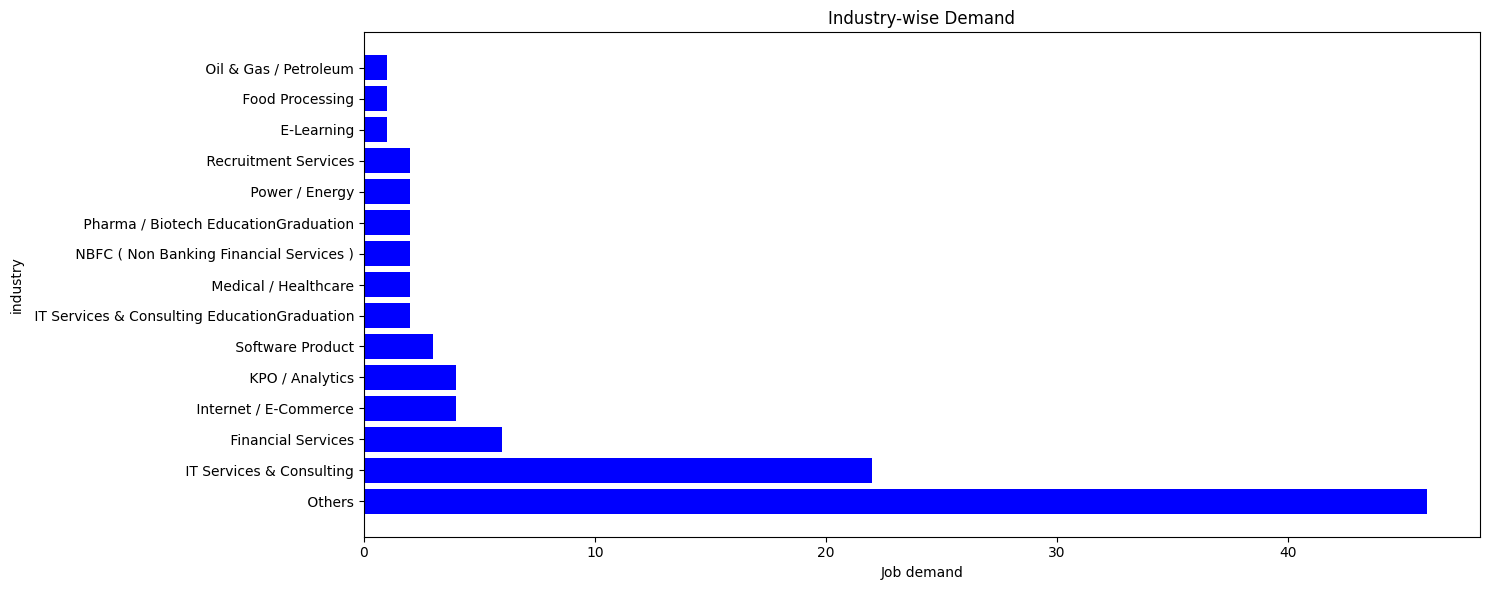

In [ ]:
top_10_industry=dict(df.groupby("Industry")["Industry"].count().sort_values(ascending=False))

indust_ry=[ind for ind,cnt in top_10_industry.items()]
job_demand=[cnt for ind,cnt in top_10_industry.items()]

plt.figure(figsize=(15,6))
plt.barh(indust_ry,job_demand, color='blue')
plt.xlabel('Job demand')
plt.ylabel('industry')
plt.title('Industry-wise Demand')
plt.tight_layout()
plt.show()

##### Note-  I couldn't get the data I needed from Naukri, Indeed, or LinkedIn using Beautiful Soup. So, I ended up scraping information from Shine.com instead. The issue is that many job listings on Shine.com don't include salary details, which makes it harder to analyze the data thoroughly.